<a href="https://colab.research.google.com/github/anushkagupta1307/IR2022_Project_27/blob/main/IR_Project_FirstBaseline.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install bs4

In [ ]:
pip install lxml

In [ ]:
pip install requests

In [ ]:
#extracting data from the URLS fetched to the system using external file 
from bs4 import BeautifulSoup
import requests

def main(URL):
	
	#header user for establising connection from the browser
	HEADERS = ({'User-Agent':'Mozilla/5.0 (Linux; ; )AppleWebKit/(KHTML, like Gecko) Chrome/Safari'})

	#getting content of the webpage of the URL
	webpage = requests.get(URL, headers=HEADERS)
	soup = BeautifulSoup(webpage.content, "lxml")
	input_dictionary={}
 
  #fetching product title from the webpage using the id - productTitle and if not present then, NA is written instead
	try:
		title = soup.find("span",attrs={"id": 'productTitle'})
		title_value = title.string
		title_string = title_value.strip().replace(',', '')

	except AttributeError:
		title_string = "NA"

	input_dictionary['product title']=title_string

	#fetching price from the webpage using the id - a-offscreen and if not present then, NA is written instead
	try:
		price = float(soup.find("span", attrs={'class': 'a-offscreen'}).string.strip().replace('₹', '').replace(',',''))
	except AttributeError:
		price = "NA"

	input_dictionary['product price']=price

	#fetching rating from the webpage using the id - a-icon a-icon-star a-star-4-5 and if not present then, NA is written instead
	try:
		rating = soup.find("i", attrs={'class': 'a-icon a-icon-star a-star-4-5'}).string.strip().replace(',', '')

	except AttributeError:
		try:
			rating = soup.find("span", attrs={'class': 'a-icon-alt'}).string.strip().replace(',', '')
		except:
			rating = "NA"

	input_dictionary['overall rating']=rating
	
	#fetching review count from the webpage using the id - acrCustomerReviewText and if not present then, NA is written instead
	try:
		review_count = soup.find(
			"span", attrs={'id': 'acrCustomerReviewText'}).string.strip().replace(',', '')

	except AttributeError:
		review_count = "NA"

	input_dictionary['total reviews']=review_count

	#fetching availability from the webpage using the id - availability and if not present then, NA is written instead
	try:
		available = soup.find("div", attrs={'id': 'availability'})
		available = available.find("span").string.strip().replace(',', '')

	except AttributeError:
		available = "NA"

	input_dictionary['Availability']=available

	#dictionary contains column name as key and their corresponding value as the value in dictonary
	return input_dictionary; 
 

if __name__=='__main__':
  
	#opening the file and reading each URL and storing info from the above function in form of list
	file = open("url.txt", "r")
	data_list = []
	for links in file.readlines():
		input_dictionary=main(links)
		data_list.append(input_dictionary)  

In [ ]:
#converting list to dataframe and visualizing the result 
import pandas as pd
df = pd.DataFrame(data_list)
df

,product title,product price,overall rating,total reviews,Availability
0,Samsung Galaxy M12 (Blue6GB RAM 128GB Storage)...,12499.0,4.1 out of 5 stars,135879 ratings,In stock.
1,Samsung Galaxy M32 5G (Sky Blue 6GB RAM 128GB ...,16999.0,4.1 out of 5 stars,25859 ratings,In stock.
2,Samsung Galaxy M21 2021 Edition (Arctic Blue 4...,12999.0,4.2 out of 5 stars,215001 ratings,In stock.
3,Samsung Galaxy S20 FE 5G (Cloud Navy 8GB RAM 1...,36990.0,4.4 out of 5 stars,13375 ratings,In stock.
4,realme narzo 50A (Oxygen Blue 4GB RAM + 128 G...,12499.0,4.2 out of 5 stars,23768 ratings,In stock.
5,Redmi Note 11 (Horizon Blue 6GB RAM 128GB Stor...,15999.0,4.1 out of 5 stars,9564 ratings,In stock.
6,Redmi 9 Activ (Carbon Black 6GB RAM 128GB Stor...,11499.0,4.2 out of 5 stars,154015 ratings,In stock.
7,OnePlus 9 5G (Astral Black 8GB RAM 128GB Storage),40599.0,4.2 out of 5 stars,11957 ratings,In stock.
8,Redmi 9A Sport (Metallic Blue 2GB RAM 32GB Sto...,6999.0,4.2 out of 5 stars,157960 ratings,Usually dispatched in 2 to 3 weeks.
9,Redmi 10 Prime (Phantom Black 4GB RAM 64GB | H...,12499.0,4.1 out of 5 stars,36843 ratings,In stock.


In [ ]:
#appending the URL's with the respective product 
file = open("url.txt", "r")
url_lists = []
for links in file.readlines():
  url_lists.append(links)
		

In [ ]:
#adding new column with URL of product to the dataframe
df['URL']=url_lists

In [ ]:
#visualizing the updated dataframe
df

,product title,product price,overall rating,total reviews,Availability,URL
0,Samsung Galaxy M12 (Blue6GB RAM 128GB Storage)...,12499.0,4.1 out of 5 stars,135879 ratings,In stock.,https://www.amazon.in/Samsung-Galaxy-M12-Stora...
1,Samsung Galaxy M32 5G (Sky Blue 6GB RAM 128GB ...,16999.0,4.1 out of 5 stars,25859 ratings,In stock.,https://www.amazon.in/Samsung-Galaxy-Blue-128G...
2,Samsung Galaxy M21 2021 Edition (Arctic Blue 4...,12999.0,4.2 out of 5 stars,215001 ratings,In stock.,https://www.amazon.in/Samsung-Storage-sAMOLED-...
3,Samsung Galaxy S20 FE 5G (Cloud Navy 8GB RAM 1...,36990.0,4.4 out of 5 stars,13375 ratings,In stock.,https://www.amazon.in/Samsung-Galaxy-Cloud-128...
4,realme narzo 50A (Oxygen Blue 4GB RAM + 128 G...,12499.0,4.2 out of 5 stars,23768 ratings,In stock.,https://www.amazon.in/realme-Oxygen-Storage-Pr...
5,Redmi Note 11 (Horizon Blue 6GB RAM 128GB Stor...,15999.0,4.1 out of 5 stars,9564 ratings,In stock.,https://www.amazon.in/Redmi-Horizon-Storage-Qu...
6,Redmi 9 Activ (Carbon Black 6GB RAM 128GB Stor...,11499.0,4.2 out of 5 stars,154015 ratings,In stock.,https://www.amazon.in/Redmi-Activ-Coral-Green-...
7,OnePlus 9 5G (Astral Black 8GB RAM 128GB Storage),40599.0,4.2 out of 5 stars,11957 ratings,In stock.,https://www.amazon.in/gp/product/B089MT34QG/re...
8,Redmi 9A Sport (Metallic Blue 2GB RAM 32GB Sto...,6999.0,4.2 out of 5 stars,157960 ratings,Usually dispatched in 2 to 3 weeks.,https://www.amazon.in/Redmi-9A-Sport-Octa-core...
9,Redmi 10 Prime (Phantom Black 4GB RAM 64GB | H...,12499.0,4.1 out of 5 stars,36843 ratings,In stock.,https://www.amazon.in/gp/product/B09CTYGJSD/re...


In [ ]:
#function add popularity with the dataframe 
def fun(URL):
  #establishing connection with amazon API with the below mentioned header
  HEADERS = ({'User-Agent':'Mozilla/5.0 (Linux; ; )AppleWebKit/(KHTML, like Gecko) Chrome/Safari'})

  #getting content of webpage using the header
  webpage = requests.get(URL, headers=HEADERS)
  soup = BeautifulSoup(webpage.content, "lxml")
  try:
    #considered number of question asked directly propotional to the popularity hence, fetched questions with the class name - a-link-normal askATFLink 
    popularity = str(soup.find("", attrs={'class': 'a-link-normal askATFLink'}))
    #print(popularity)
    if popularity!="None":
      result=popularity.index('answered')
      startIndex=0
      #fetching relevant information from the id 
      for i in range(result-2,1,-1):
        if popularity[i]==' ':
          startIndex=i
          break;
      if popularity[result-2]=='+':
        popularity_score=popularity[startIndex:result-2]
      else:
        popularity_score=popularity[startIndex:result-1]
    else:
      popularity_score="NA"

  except AttributeError:
    popularity_score = "NA"
  #print("Popularity Score = ", popularity_score)
  return popularity_score

file = open("url.txt", "r")
popularity_scores_list = []

#iterating over each URL and appending popularity score for each of the link to the list
for links in file.readlines():
		popularity_score=fun(links)
		popularity_scores_list.append(popularity_score)


In [ ]:
#appending new column to the dataframe with the popularity score in it 
df['popularity score']=popularity_scores_list

In [ ]:
#visualizing dataframe 
df

,product title,product price,overall rating,total reviews,Availability,URL,popularity score
0,Samsung Galaxy M12 (Blue6GB RAM 128GB Storage)...,12499.0,4.1 out of 5 stars,135879 ratings,In stock.,https://www.amazon.in/Samsung-Galaxy-M12-Stora...,1000
1,Samsung Galaxy M32 5G (Sky Blue 6GB RAM 128GB ...,16999.0,4.1 out of 5 stars,25859 ratings,In stock.,https://www.amazon.in/Samsung-Galaxy-Blue-128G...,1000
2,Samsung Galaxy M21 2021 Edition (Arctic Blue 4...,12999.0,4.2 out of 5 stars,215001 ratings,In stock.,https://www.amazon.in/Samsung-Storage-sAMOLED-...,1000
3,Samsung Galaxy S20 FE 5G (Cloud Navy 8GB RAM 1...,36990.0,4.4 out of 5 stars,13375 ratings,In stock.,https://www.amazon.in/Samsung-Galaxy-Cloud-128...,989
4,realme narzo 50A (Oxygen Blue 4GB RAM + 128 G...,12499.0,4.2 out of 5 stars,23768 ratings,In stock.,https://www.amazon.in/realme-Oxygen-Storage-Pr...,555
5,Redmi Note 11 (Horizon Blue 6GB RAM 128GB Stor...,15999.0,4.1 out of 5 stars,9564 ratings,In stock.,https://www.amazon.in/Redmi-Horizon-Storage-Qu...,372
6,Redmi 9 Activ (Carbon Black 6GB RAM 128GB Stor...,11499.0,4.2 out of 5 stars,154015 ratings,In stock.,https://www.amazon.in/Redmi-Activ-Coral-Green-...,1000
7,OnePlus 9 5G (Astral Black 8GB RAM 128GB Storage),40599.0,4.2 out of 5 stars,11957 ratings,In stock.,https://www.amazon.in/gp/product/B089MT34QG/re...,575
8,Redmi 9A Sport (Metallic Blue 2GB RAM 32GB Sto...,6999.0,4.2 out of 5 stars,157960 ratings,Usually dispatched in 2 to 3 weeks.,https://www.amazon.in/Redmi-9A-Sport-Octa-core...,1000
9,Redmi 10 Prime (Phantom Black 4GB RAM 64GB | H...,12499.0,4.1 out of 5 stars,36843 ratings,In stock.,https://www.amazon.in/gp/product/B09CTYGJSD/re...,780


In [ ]:
#sorting devices with price
df_sorted_price=df.sort_values('product price',ascending=True)

In [ ]:
df_sorted_price

,product title,product price,overall rating,total reviews,Availability,URL,popularity score
8,Redmi 9A Sport (Metallic Blue 2GB RAM 32GB Sto...,6999.0,4.2 out of 5 stars,157960 ratings,Usually dispatched in 2 to 3 weeks.,https://www.amazon.in/Redmi-9A-Sport-Octa-core...,1000
6,Redmi 9 Activ (Carbon Black 6GB RAM 128GB Stor...,11499.0,4.2 out of 5 stars,154015 ratings,In stock.,https://www.amazon.in/Redmi-Activ-Coral-Green-...,1000
0,Samsung Galaxy M12 (Blue6GB RAM 128GB Storage)...,12499.0,4.1 out of 5 stars,135879 ratings,In stock.,https://www.amazon.in/Samsung-Galaxy-M12-Stora...,1000
4,realme narzo 50A (Oxygen Blue 4GB RAM + 128 G...,12499.0,4.2 out of 5 stars,23768 ratings,In stock.,https://www.amazon.in/realme-Oxygen-Storage-Pr...,555
9,Redmi 10 Prime (Phantom Black 4GB RAM 64GB | H...,12499.0,4.1 out of 5 stars,36843 ratings,In stock.,https://www.amazon.in/gp/product/B09CTYGJSD/re...,780
11,Redmi 10 Prime (Astral White 4GB RAM 64GB ROM ...,12499.0,4.1 out of 5 stars,36843 ratings,In stock.,https://www.amazon.in/Redmi-10-Prime-extendabl...,780
2,Samsung Galaxy M21 2021 Edition (Arctic Blue 4...,12999.0,4.2 out of 5 stars,215001 ratings,In stock.,https://www.amazon.in/Samsung-Storage-sAMOLED-...,1000
12,Redmi Note 10S (Deep Sea Blue 6GB RAM 64GB Sto...,12999.0,4.2 out of 5 stars,60594 ratings,In stock.,https://www.amazon.in/Redmi-Storage-Super-Amol...,1000
5,Redmi Note 11 (Horizon Blue 6GB RAM 128GB Stor...,15999.0,4.1 out of 5 stars,9564 ratings,In stock.,https://www.amazon.in/Redmi-Horizon-Storage-Qu...,372
1,Samsung Galaxy M32 5G (Sky Blue 6GB RAM 128GB ...,16999.0,4.1 out of 5 stars,25859 ratings,In stock.,https://www.amazon.in/Samsung-Galaxy-Blue-128G...,1000


In [ ]:
#cleaning data - by collecting indexes where rating is not present there
list_of_indexes_of_rows_to_remove=[]
for i in range(len(df_sorted_price)):
  if "Previous" in df_sorted_price["overall rating"][i]:
    list_of_indexes_of_rows_to_remove.append(i)


In [ ]:
list_of_indexes_of_rows_to_remove

[]

In [ ]:
#droppping all those cleaned rows with no rating in it 
df_sorted_price.drop(list_of_indexes_of_rows_to_remove, axis=0, inplace=True)

In [ ]:
#reseting indexes after sorting according to price
df_sorted_price.reset_index(drop=True, inplace=True)
df_sorted_price


,product title,product price,overall rating,total reviews,Availability,URL,popularity score
0,Redmi 9A Sport (Metallic Blue 2GB RAM 32GB Sto...,6999.0,4.2 out of 5 stars,157960 ratings,Usually dispatched in 2 to 3 weeks.,https://www.amazon.in/Redmi-9A-Sport-Octa-core...,1000
1,Redmi 9 Activ (Carbon Black 6GB RAM 128GB Stor...,11499.0,4.2 out of 5 stars,154015 ratings,In stock.,https://www.amazon.in/Redmi-Activ-Coral-Green-...,1000
2,Samsung Galaxy M12 (Blue6GB RAM 128GB Storage)...,12499.0,4.1 out of 5 stars,135879 ratings,In stock.,https://www.amazon.in/Samsung-Galaxy-M12-Stora...,1000
3,realme narzo 50A (Oxygen Blue 4GB RAM + 128 G...,12499.0,4.2 out of 5 stars,23768 ratings,In stock.,https://www.amazon.in/realme-Oxygen-Storage-Pr...,555
4,Redmi 10 Prime (Phantom Black 4GB RAM 64GB | H...,12499.0,4.1 out of 5 stars,36843 ratings,In stock.,https://www.amazon.in/gp/product/B09CTYGJSD/re...,780
5,Redmi 10 Prime (Astral White 4GB RAM 64GB ROM ...,12499.0,4.1 out of 5 stars,36843 ratings,In stock.,https://www.amazon.in/Redmi-10-Prime-extendabl...,780
6,Samsung Galaxy M21 2021 Edition (Arctic Blue 4...,12999.0,4.2 out of 5 stars,215001 ratings,In stock.,https://www.amazon.in/Samsung-Storage-sAMOLED-...,1000
7,Redmi Note 10S (Deep Sea Blue 6GB RAM 64GB Sto...,12999.0,4.2 out of 5 stars,60594 ratings,In stock.,https://www.amazon.in/Redmi-Storage-Super-Amol...,1000
8,Redmi Note 11 (Horizon Blue 6GB RAM 128GB Stor...,15999.0,4.1 out of 5 stars,9564 ratings,In stock.,https://www.amazon.in/Redmi-Horizon-Storage-Qu...,372
9,Samsung Galaxy M32 5G (Sky Blue 6GB RAM 128GB ...,16999.0,4.1 out of 5 stars,25859 ratings,In stock.,https://www.amazon.in/Samsung-Galaxy-Blue-128G...,1000


In [ ]:
#extracting rating from the string mentioned
extracted_ratings=[]
for i in range(len(df_sorted_price)):
  for j in range(len(df_sorted_price['overall rating'][i])):
    if df_sorted_price['overall rating'][i][j]==" ":
      count=j
      break;
  #print(count)

  #print(df_sorted_price['overall rating'][i][:count])
  extracted_ratings.append(float(df_sorted_price['overall rating'][i][:count]))


In [ ]:
#appending new column - extracted ratings with the values calculated in the above cell to already existing columns in the dataframe
df_sorted_price['extracted ratings']=extracted_ratings

In [ ]:
#visualizing dataframe after appending 
df_sorted_price

,product title,product price,overall rating,total reviews,Availability,URL,popularity score,extracted ratings
0,Redmi 9A Sport (Metallic Blue 2GB RAM 32GB Sto...,6999.0,4.2 out of 5 stars,157960 ratings,Usually dispatched in 2 to 3 weeks.,https://www.amazon.in/Redmi-9A-Sport-Octa-core...,1000,4.2
1,Redmi 9 Activ (Carbon Black 6GB RAM 128GB Stor...,11499.0,4.2 out of 5 stars,154015 ratings,In stock.,https://www.amazon.in/Redmi-Activ-Coral-Green-...,1000,4.2
2,Samsung Galaxy M12 (Blue6GB RAM 128GB Storage)...,12499.0,4.1 out of 5 stars,135879 ratings,In stock.,https://www.amazon.in/Samsung-Galaxy-M12-Stora...,1000,4.1
3,realme narzo 50A (Oxygen Blue 4GB RAM + 128 G...,12499.0,4.2 out of 5 stars,23768 ratings,In stock.,https://www.amazon.in/realme-Oxygen-Storage-Pr...,555,4.2
4,Redmi 10 Prime (Phantom Black 4GB RAM 64GB | H...,12499.0,4.1 out of 5 stars,36843 ratings,In stock.,https://www.amazon.in/gp/product/B09CTYGJSD/re...,780,4.1
5,Redmi 10 Prime (Astral White 4GB RAM 64GB ROM ...,12499.0,4.1 out of 5 stars,36843 ratings,In stock.,https://www.amazon.in/Redmi-10-Prime-extendabl...,780,4.1
6,Samsung Galaxy M21 2021 Edition (Arctic Blue 4...,12999.0,4.2 out of 5 stars,215001 ratings,In stock.,https://www.amazon.in/Samsung-Storage-sAMOLED-...,1000,4.2
7,Redmi Note 10S (Deep Sea Blue 6GB RAM 64GB Sto...,12999.0,4.2 out of 5 stars,60594 ratings,In stock.,https://www.amazon.in/Redmi-Storage-Super-Amol...,1000,4.2
8,Redmi Note 11 (Horizon Blue 6GB RAM 128GB Stor...,15999.0,4.1 out of 5 stars,9564 ratings,In stock.,https://www.amazon.in/Redmi-Horizon-Storage-Qu...,372,4.1
9,Samsung Galaxy M32 5G (Sky Blue 6GB RAM 128GB ...,16999.0,4.1 out of 5 stars,25859 ratings,In stock.,https://www.amazon.in/Samsung-Galaxy-Blue-128G...,1000,4.1


In [ ]:
#pre-processing the popularity score for newer devices with replacing 0 for devices with no questions asked till now 
for i in range(len(df_sorted_price)):
  if "NA" in df_sorted_price['popularity score'][i]:
    df_sorted_price['popularity score'][i]=0


In [ ]:
#devices with no reviews is also pre-processed while replace "NA" with 0. 
for i in range(len(df_sorted_price)):
  if df_sorted_price['total reviews'][i]=="NA":
    df_sorted_price['total reviews'][i]="0 ratings"


In [ ]:
#extracting count of total reviews from the string text present 
extracted_reviews=[]
for i in range(len(df_sorted_price)):
  for j in range(len(df_sorted_price['total reviews'][i])):
    if df_sorted_price['total reviews'][i][j]==" ":
      count=j
      break;

  extracted_reviews.append(float(df_sorted_price['total reviews'][i][:count]))


In [ ]:
#storing total reviews count in a new column - extracted reviews
df_sorted_price['extracted reviews']=extracted_reviews

In [ ]:
#visualizing dataframe now 
df_sorted_price

,product title,product price,overall rating,total reviews,Availability,URL,popularity score,extracted ratings,extracted reviews
0,Redmi 9A Sport (Metallic Blue 2GB RAM 32GB Sto...,6999.0,4.2 out of 5 stars,157960 ratings,Usually dispatched in 2 to 3 weeks.,https://www.amazon.in/Redmi-9A-Sport-Octa-core...,1000,4.2,157960.0
1,Redmi 9 Activ (Carbon Black 6GB RAM 128GB Stor...,11499.0,4.2 out of 5 stars,154015 ratings,In stock.,https://www.amazon.in/Redmi-Activ-Coral-Green-...,1000,4.2,154015.0
2,Samsung Galaxy M12 (Blue6GB RAM 128GB Storage)...,12499.0,4.1 out of 5 stars,135879 ratings,In stock.,https://www.amazon.in/Samsung-Galaxy-M12-Stora...,1000,4.1,135879.0
3,realme narzo 50A (Oxygen Blue 4GB RAM + 128 G...,12499.0,4.2 out of 5 stars,23768 ratings,In stock.,https://www.amazon.in/realme-Oxygen-Storage-Pr...,555,4.2,23768.0
4,Redmi 10 Prime (Phantom Black 4GB RAM 64GB | H...,12499.0,4.1 out of 5 stars,36843 ratings,In stock.,https://www.amazon.in/gp/product/B09CTYGJSD/re...,780,4.1,36843.0
5,Redmi 10 Prime (Astral White 4GB RAM 64GB ROM ...,12499.0,4.1 out of 5 stars,36843 ratings,In stock.,https://www.amazon.in/Redmi-10-Prime-extendabl...,780,4.1,36843.0
6,Samsung Galaxy M21 2021 Edition (Arctic Blue 4...,12999.0,4.2 out of 5 stars,215001 ratings,In stock.,https://www.amazon.in/Samsung-Storage-sAMOLED-...,1000,4.2,215001.0
7,Redmi Note 10S (Deep Sea Blue 6GB RAM 64GB Sto...,12999.0,4.2 out of 5 stars,60594 ratings,In stock.,https://www.amazon.in/Redmi-Storage-Super-Amol...,1000,4.2,60594.0
8,Redmi Note 11 (Horizon Blue 6GB RAM 128GB Stor...,15999.0,4.1 out of 5 stars,9564 ratings,In stock.,https://www.amazon.in/Redmi-Horizon-Storage-Qu...,372,4.1,9564.0
9,Samsung Galaxy M32 5G (Sky Blue 6GB RAM 128GB ...,16999.0,4.1 out of 5 stars,25859 ratings,In stock.,https://www.amazon.in/Samsung-Galaxy-Blue-128G...,1000,4.1,25859.0


In [ ]:
for i in range(len(df_sorted_price['popularity score'])):
  df_sorted_price['popularity score'][i]=float(df_sorted_price['popularity score'][i])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
#calculated maximum and minimum value for various columns - will be used further in normalization of values 
max_product_price=df_sorted_price['product price'].max()
min_product_price=df_sorted_price['product price'].min()
max_popularity_score=df_sorted_price['popularity score'].max()
min_popularity_score=df_sorted_price['popularity score'].min()
max_extracted_rating=df_sorted_price['extracted ratings'].max()
min_extracted_rating=df_sorted_price['extracted ratings'].min()
max_extracted_reviews=df_sorted_price['extracted reviews'].max()
min_extracted_reviews=df_sorted_price['extracted reviews'].min()

In [ ]:
#normalized price, popularity, total number of ratings and extarcted reviews using (current value - min_value)/(max_value - min_values) and then, 
#calculated buying probability while giving equal weightage all four feature and giving negative weight to price
#as less the price more, it would be better for the buyer
calulated_score=[]
for i in range(len(df_sorted_price)):
  df_sorted_price['product price'][i]=(df_sorted_price['product price'][i]-min_product_price)/(max_product_price-min_product_price)
  df_sorted_price['popularity score'][i]=(df_sorted_price['popularity score'][i]-min_popularity_score)/(max_popularity_score-min_popularity_score)
  df_sorted_price['extracted ratings'][i]=(df_sorted_price['extracted ratings'][i]-min_extracted_rating)/(max_extracted_rating-min_extracted_rating)
  df_sorted_price['extracted reviews'][i]=(df_sorted_price['extracted reviews'][i]-min_extracted_reviews)/(max_extracted_reviews-min_extracted_reviews)

  temp=float(df_sorted_price['extracted reviews'][i]*0.25+df_sorted_price['extracted ratings'][i]*0.25+df_sorted_price['popularity score'][i]*0.25-df_sorted_price['product price'][i]*0.25)
  calulated_score.append(temp)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value

In [ ]:
#appended calculated score to new column - probab score
df_sorted_price['probab score']=calulated_score

In [ ]:
#soritng all the devices using the score calculated
df_sorted_score=df_sorted_price.sort_values('probab score',ascending=False)

In [ ]:
#visualizig dataframe with sorted scores
df_sorted_score

,product title,product price,overall rating,total reviews,Availability,URL,popularity score,extracted ratings,extracted reviews,probab score
6,Samsung Galaxy M21 2021 Edition (Arctic Blue 4...,0.178571,4.2 out of 5 stars,215001 ratings,In stock.,https://www.amazon.in/Samsung-Storage-sAMOLED-...,1.0,0.25,1.000000,0.517857
0,Redmi 9A Sport (Metallic Blue 2GB RAM 32GB Sto...,0.000000,4.2 out of 5 stars,157960 ratings,Usually dispatched in 2 to 3 weeks.,https://www.amazon.in/Redmi-9A-Sport-Octa-core...,1.0,0.25,0.722343,0.493086
1,Redmi 9 Activ (Carbon Black 6GB RAM 128GB Stor...,0.133929,4.2 out of 5 stars,154015 ratings,In stock.,https://www.amazon.in/Redmi-Activ-Coral-Green-...,1.0,0.25,0.703140,0.454803
2,Samsung Galaxy M12 (Blue6GB RAM 128GB Storage)...,0.163690,4.1 out of 5 stars,135879 ratings,In stock.,https://www.amazon.in/Samsung-Galaxy-M12-Stora...,1.0,0.00,0.614860,0.362792
10,iQOO 7 5G (Storm Black 8GB RAM 128GB Storage) ...,0.684256,4.5 out of 5 stars,21955 ratings,Usually dispatched in 3 to 4 weeks.,https://www.amazon.in/gp/product/B085J1RJV6/re...,1.0,1.00,0.060315,0.344015
7,Redmi Note 10S (Deep Sea Blue 6GB RAM 64GB Sto...,0.178571,4.2 out of 5 stars,60594 ratings,In stock.,https://www.amazon.in/Redmi-Storage-Super-Amol...,1.0,0.25,0.248397,0.329956
11,Samsung Galaxy S20 FE 5G (Cloud Navy 8GB RAM 1...,0.892589,4.4 out of 5 stars,13375 ratings,In stock.,https://www.amazon.in/Samsung-Galaxy-Cloud-128...,0.982484,0.75,0.018551,0.214611
9,Samsung Galaxy M32 5G (Sky Blue 6GB RAM 128GB ...,0.297619,4.1 out of 5 stars,25859 ratings,In stock.,https://www.amazon.in/Samsung-Galaxy-Blue-128G...,1.0,0.00,0.079319,0.195425
4,Redmi 10 Prime (Phantom Black 4GB RAM 64GB | H...,0.163690,4.1 out of 5 stars,36843 ratings,In stock.,https://www.amazon.in/gp/product/B09CTYGJSD/re...,0.649682,0.00,0.132785,0.154694
5,Redmi 10 Prime (Astral White 4GB RAM 64GB ROM ...,0.163690,4.1 out of 5 stars,36843 ratings,In stock.,https://www.amazon.in/Redmi-10-Prime-extendabl...,0.649682,0.00,0.132785,0.154694


In [ ]:
#resseting indexes of the phone after sorting on basis of probability score
df_sorted_score.reset_index(drop=True, inplace=True)

In [ ]:
#function for scraping all the reviews for the provided URL

from bs4 import BeautifulSoup as bs
import requests
import pandas as pd
def scraping_amazon_reviews(url):

  flag=0;
  count=0;
  u=1;

  link=url
  page = requests.get(link)
  #getting content of the provided URL with HTML parser
  soup = bs(page.content,'html.parser')

  #gettting total number of ratings from the webpage, to know from how many pages we have to fetch data 
  total_ratings = soup.find_all("",{"data-hook":"cr-filter-info-review-rating-count"})
  #print(total_ratings)
  total_ratings_lstrips=total_ratings[0].get_text().lstrip('\n')
  total_ratings_rstrips=total_ratings_lstrips.rstrip('\n')
  total_ratings_rstrips = total_ratings_rstrips.replace(",", "")
  result = total_ratings_rstrips.index('total ratings')

  #print(result)

  position=0
  for i in range(result-2,0,-1):
      if total_ratings_rstrips[i]==' ':
        position=i
        break;

  #print(position)

  #extracted total number of reviews
  total_ratings_final=int(total_ratings_rstrips[position+1:result-1])
  #print(total_ratings_final)
  
  #creating empty dataframe with the mentioned columns
  df = pd.DataFrame(columns = ['Customer Name', 'Review title', 'Ratings','Reviews'])
  # u<=(total_ratings_final/10)
  while(u<=(200)):

    #populating dataframe page by page as each page contains only 10 reviews
    url=url+"&pageNumber="+str(u)
    page = requests.get(url)

    if page.status_code!=200:
      #print("breaked at",u)
      flag=1
      continue;
    
    soup = bs(page.content,'html.parser')

    #getting name of the reviewer using class id - a-profile-name 
    names = soup.find_all('span',class_='a-profile-name')
    cust_name = []
    for i in range(0,len(names)):
        cust_name.append(names[i].get_text())

    #popping first two names because they are for the top positve and top critical
    cust_name.pop(0)
    cust_name.pop(0)

    #collecting indexes for the repeating customer names
    indexes_to_remove=[]
    for i in range(len(cust_name)):
      
      for j in range(i+1,len(cust_name)):
        if cust_name[i]==cust_name[j]:
          #print(cust_name[i])
          indexes_to_remove.append(j)

    #storing unique entries to the list
    for i in range(len(indexes_to_remove)-1,-1,-1):
        cust_name.pop(indexes_to_remove[i])

    #fetching title of the review using the class id - review-title-content 
    title = soup.find_all('a',class_='review-title-content')
    review_title = []
    for i in range(0,len(title)):
        review_title.append(title[i].get_text())
    
    #stripping extra spaces from left and right from the title
    review_title[:] = [titles.lstrip('\n') for titles in review_title]
    review_title[:] = [titles.rstrip('\n') for titles in review_title]

    #fetching rating of the review using the class id - review-rating
    rating = soup.find_all('i',class_='review-rating')
    rate = []
    for i in range(0,len(rating)):
        rate.append(rating[i].get_text())

    #popping first two ratings because they are for the top positve and top critical
    rate.pop(0)
    rate.pop(0)

    #fetching review of the review using the class id - review-body
    review = soup.find_all("span",{"data-hook":"review-body"})

    review_content = []
    for i in range(0,len(review)):
        review_content.append(review[i].get_text())

    #stripping extra spaces from left and right from the review
    review_content[:] = [reviews.lstrip('\n') for reviews in review_content]
    review_content[:] = [reviews.rstrip('\n') for reviews in review_content]
    #print(review_content)


    #finally storing each of the value to the created dataframe earlier
    for i in range(len(cust_name)):
      
      df=df.append({'Customer Name':cust_name[i], 'Review title':review_title[i], 'Ratings':rate[i],'Reviews':review_content[i]},ignore_index=True)

    u=u+1
    count=count+1

  #print(df)
  return df;


In [ ]:
#collected top 4 URL's of devices of earlier ranked list of devices
file = open("url_downloads.txt", "r")
url_download_list = []

# iterating over the urls and storing them in the list
for links in file.readlines():
	url_download_list.append(links)

In [ ]:
#fetching all the reviews from the first URL
df1=scraping_amazon_reviews(url_download_list[0])

In [ ]:
#visualizing first dataframe 
df1

,Customer Name,Review title,Ratings,Reviews
0,Soumya,Don't buy this phone,1.0 out of 5 stars,Both 13 MP and 5MP Camera quality is good. Hav...
1,MasterDinesh,Simply excellent. Read complete review written...,5.0 out of 5 stars,Excellent mobile for daily use @7500/-. Don't ...
2,Deepak chandra joshi,One of the good choice for low budget phone,4.0 out of 5 stars,If you are looking for low budget phone this c...
3,Avijit Naskar,Amezing One,5.0 out of 5 stars,"If I started to rating it's all features, it w..."
4,Sinha,Poor,1.0 out of 5 stars,Battery is getting drained out quite fast. 7% ...
...,...,...,...,...
1995,ARIJIT ROY,BUDGET WORTHY PHONE,5.0 out of 5 stars,Worst phone.. overall performance is just bakw...
1996,Sreejith RJ,Value-For-Money & Recommended for a normal user,4.0 out of 5 stars,"I purchased it for my Mother, Decent product i..."
1997,Kandoriya Kamlesh,Dont buy it as lower model is good then this,3.0 out of 5 stars,"Not as good as redmi 8a, no type C , no fast c..."
1998,Siju,Please..... 🙏 don't Buy. Cheapest product from...,1.0 out of 5 stars,Review after one-day full usage and 28 days of...


In [ ]:
#fetching all the reviews from the second URL
df2=scraping_amazon_reviews(url_download_list[1])

In [ ]:
#fetching all the reviews from the third URL
df3=scraping_amazon_reviews(url_download_list[2])

In [ ]:
#fetching all the reviews from the fourth URL
df4=scraping_amazon_reviews(url_download_list[3])

In [ ]:
#getting reviews for the first device
reviews1=df1['Reviews']

In [ ]:
#importing libraries for WordCloud and stopwords
from wordcloud import WordCloud,STOPWORDS
import matplotlib.pyplot as plt

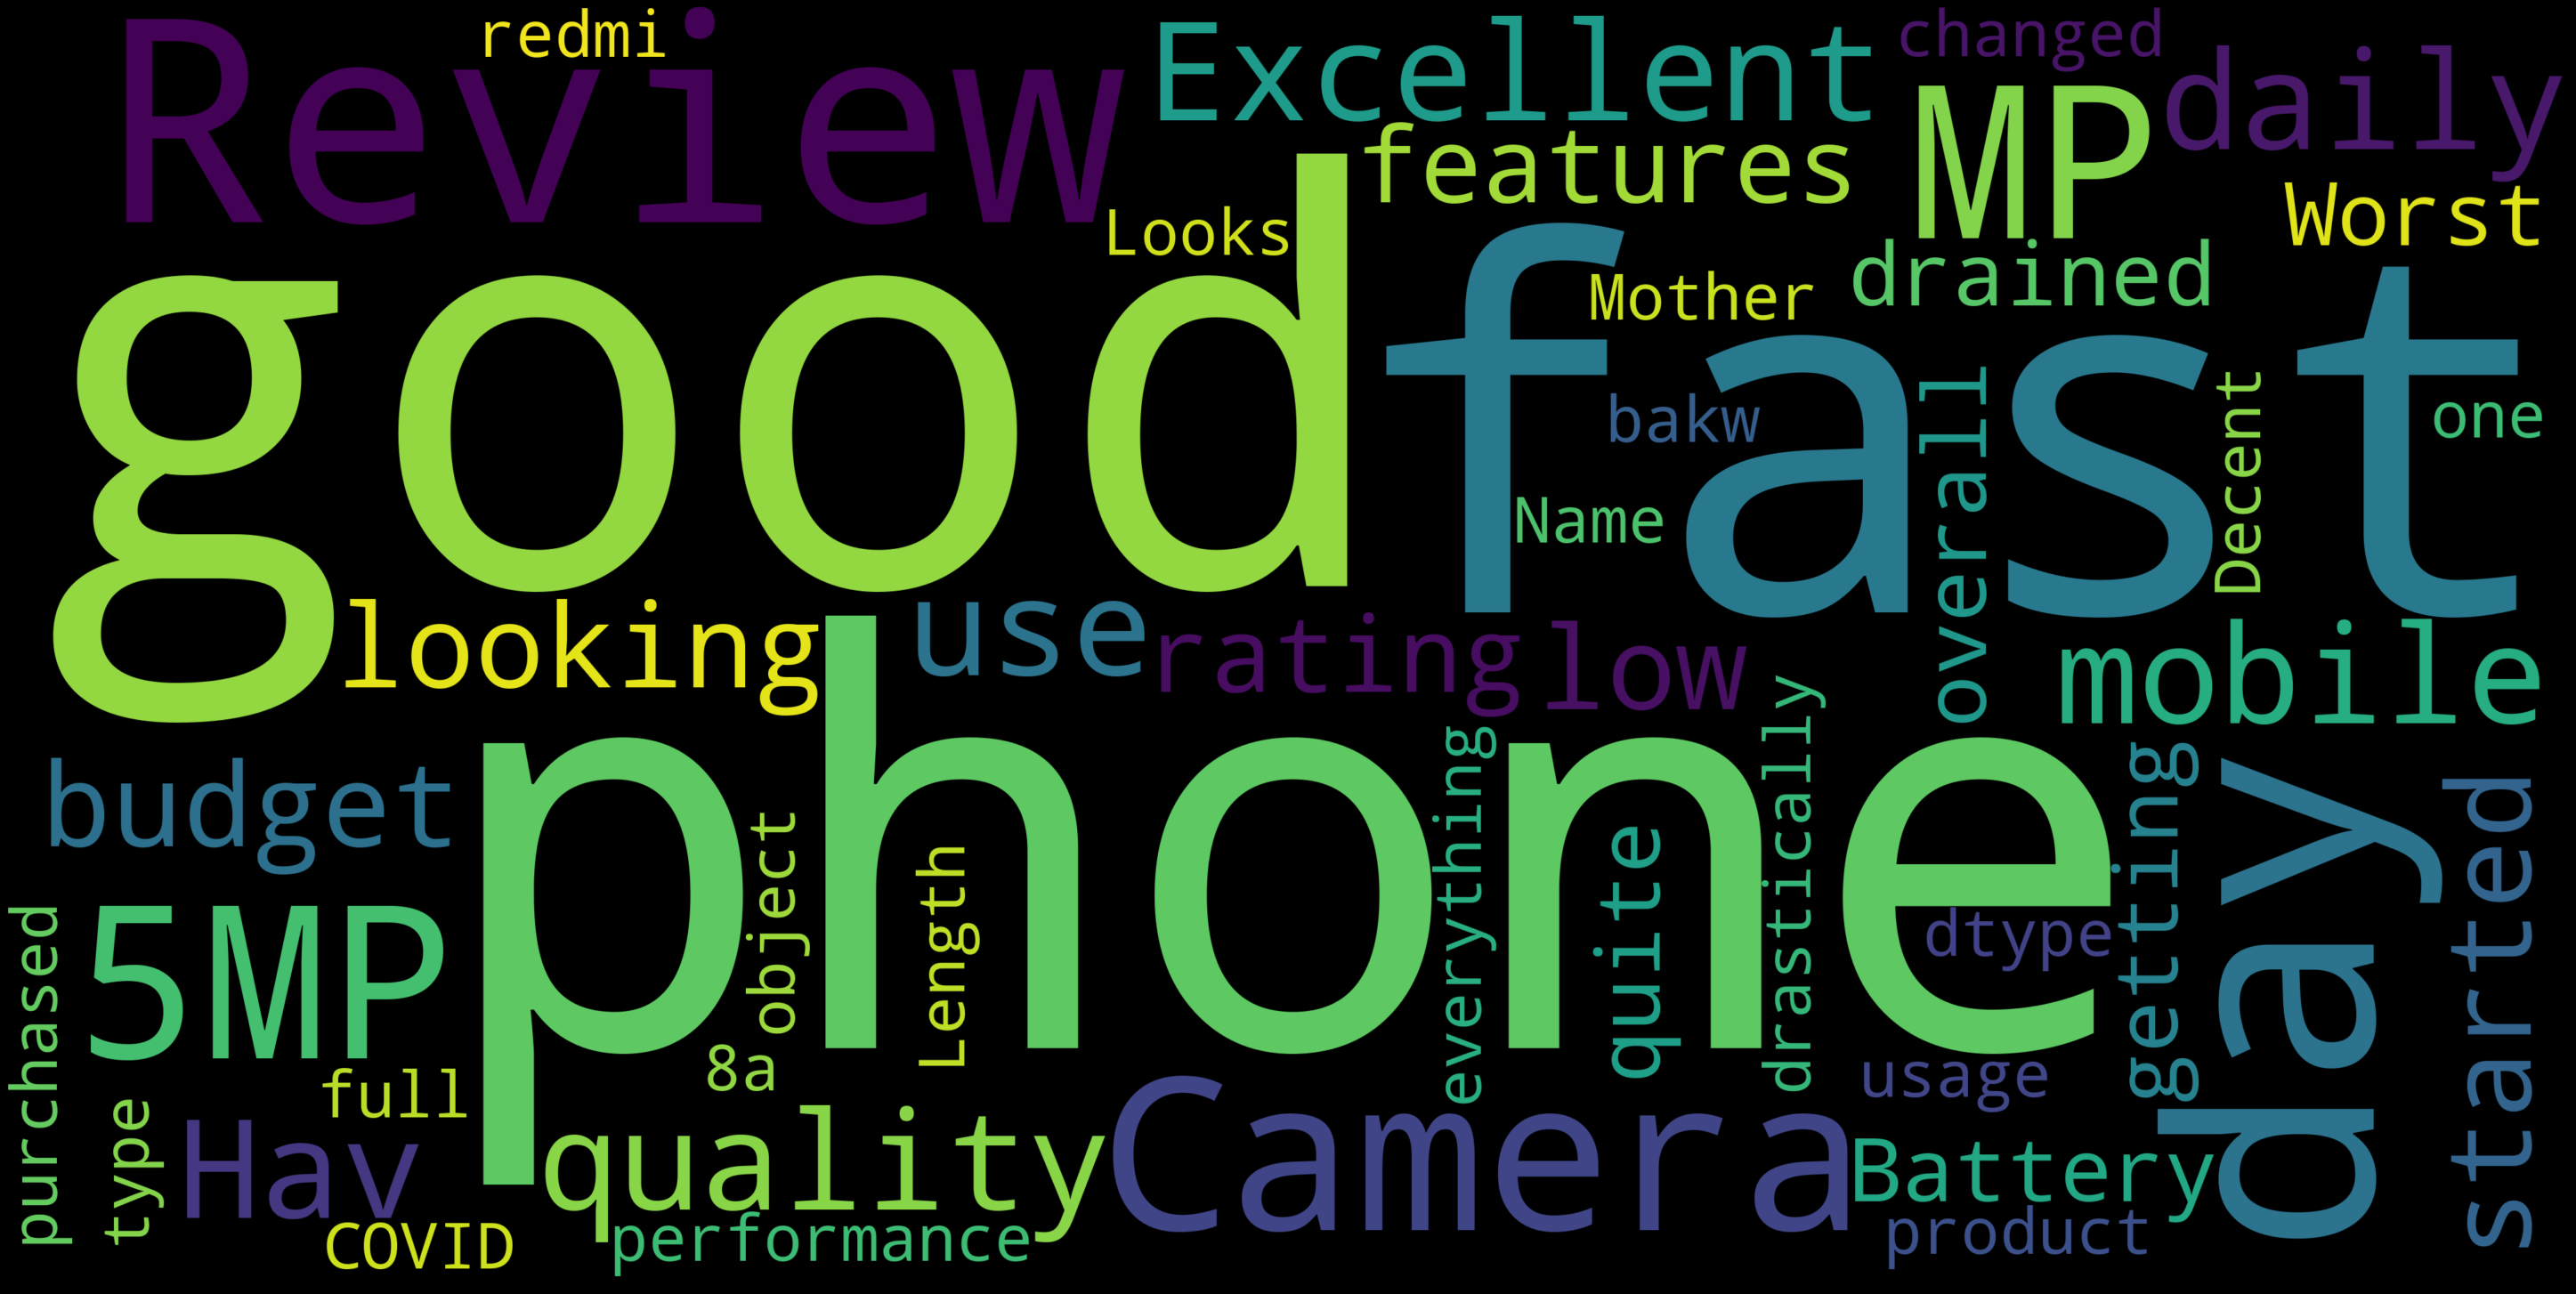

In [ ]:
#plotting wordcloud for the first device's review 
wordcloud = WordCloud(
    width = 4000,
    height = 2000,
    background_color = 'black',
    stopwords = STOPWORDS).generate(str(reviews1))
fig = plt.figure(
    figsize = (40, 30),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

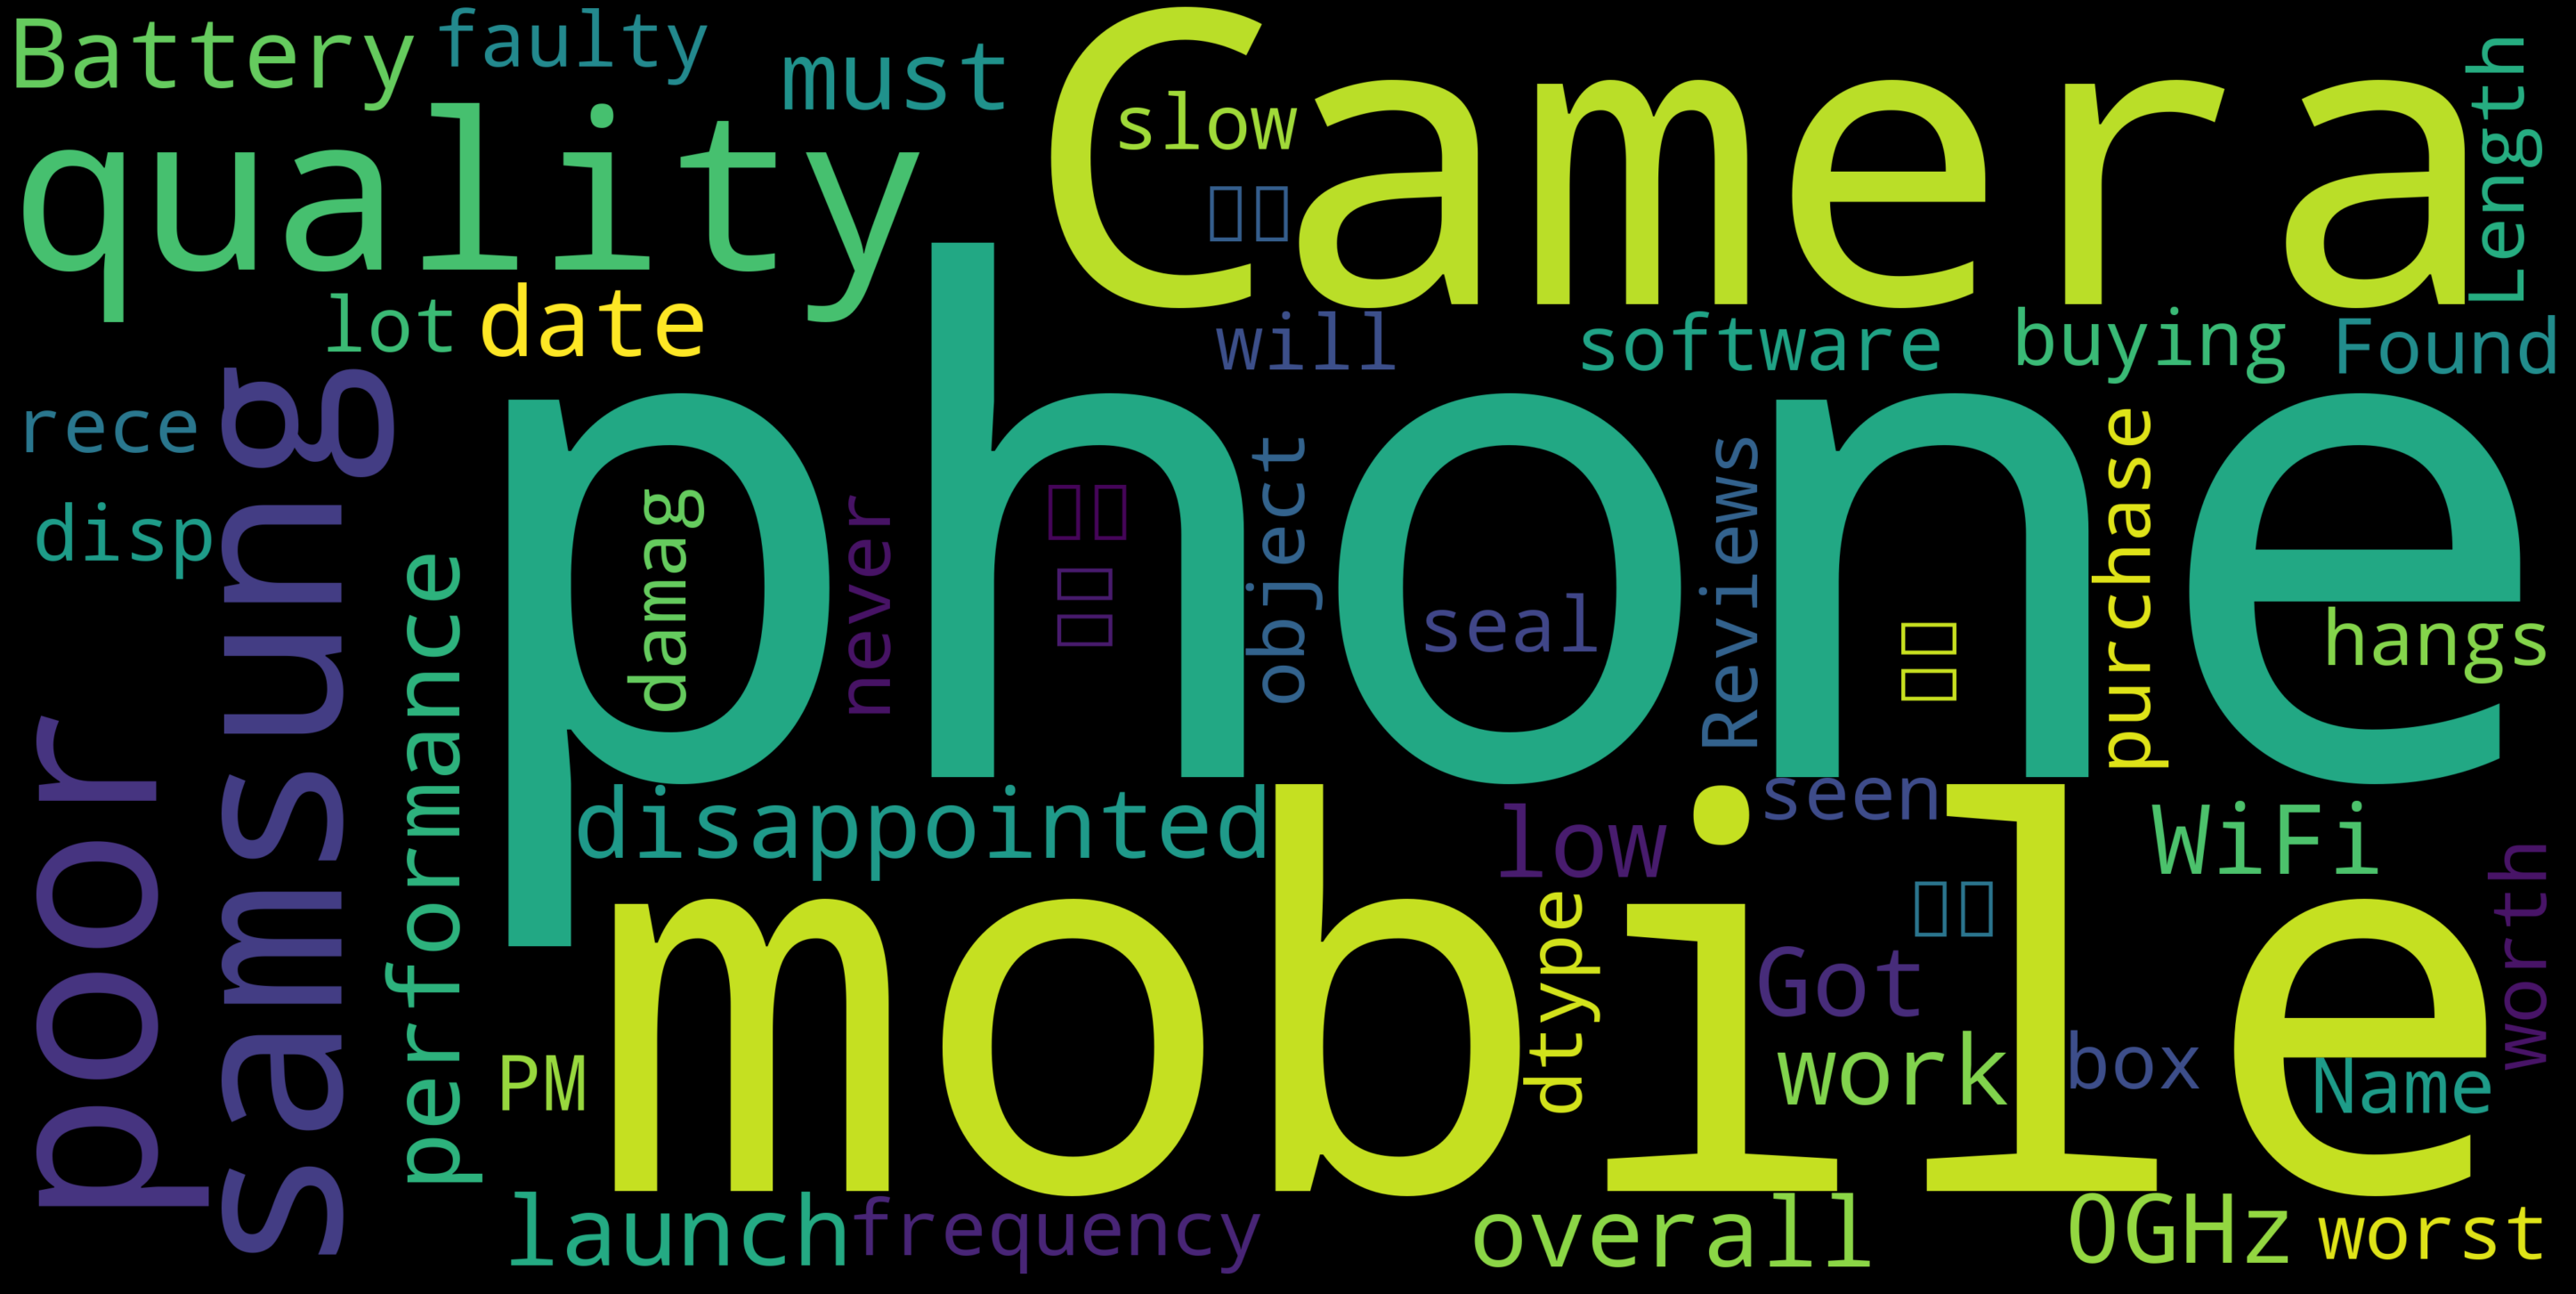

In [ ]:
#plotting wordcloud for the second device's review 
reviews2=df2['Reviews']

wordcloud = WordCloud(
    width = 4000,
    height = 2000,
    background_color = 'black',
    stopwords = STOPWORDS).generate(str(reviews2))
fig = plt.figure(
    figsize = (40, 30),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

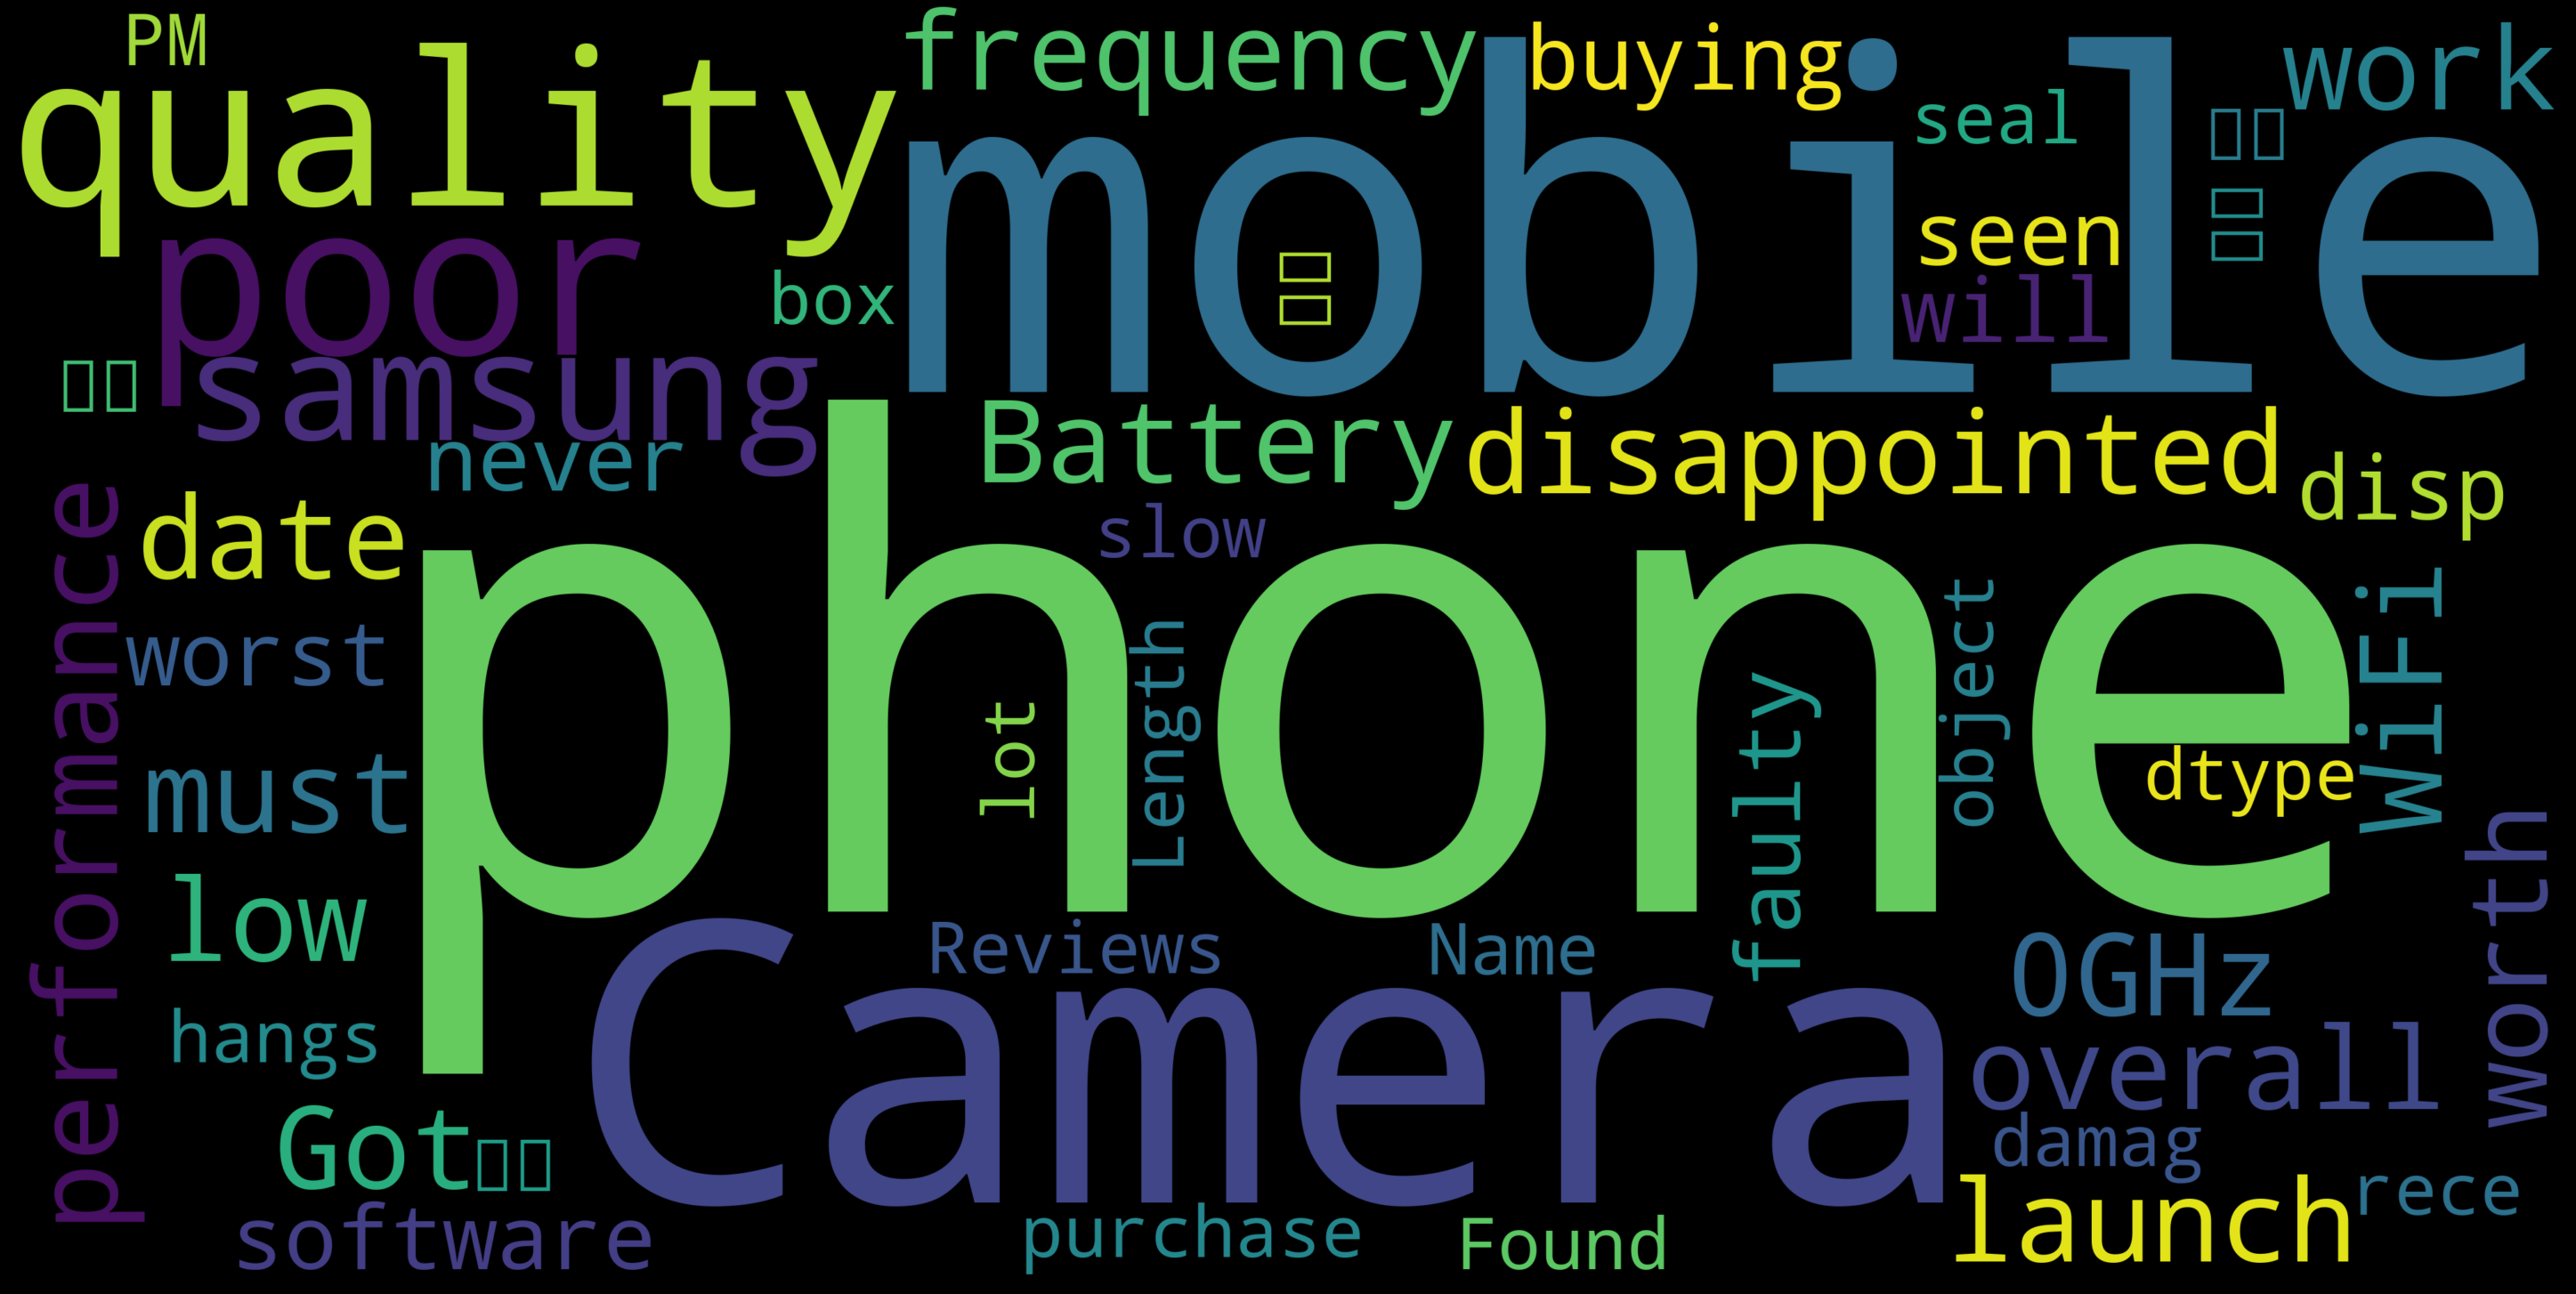

In [ ]:
#plotting wordcloud for the third device's review 
reviews3=df3['Reviews']

wordcloud = WordCloud(
    width = 4000,
    height = 2000,
    background_color = 'black',
    stopwords = STOPWORDS).generate(str(reviews3))
fig = plt.figure(
    figsize = (40, 30),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

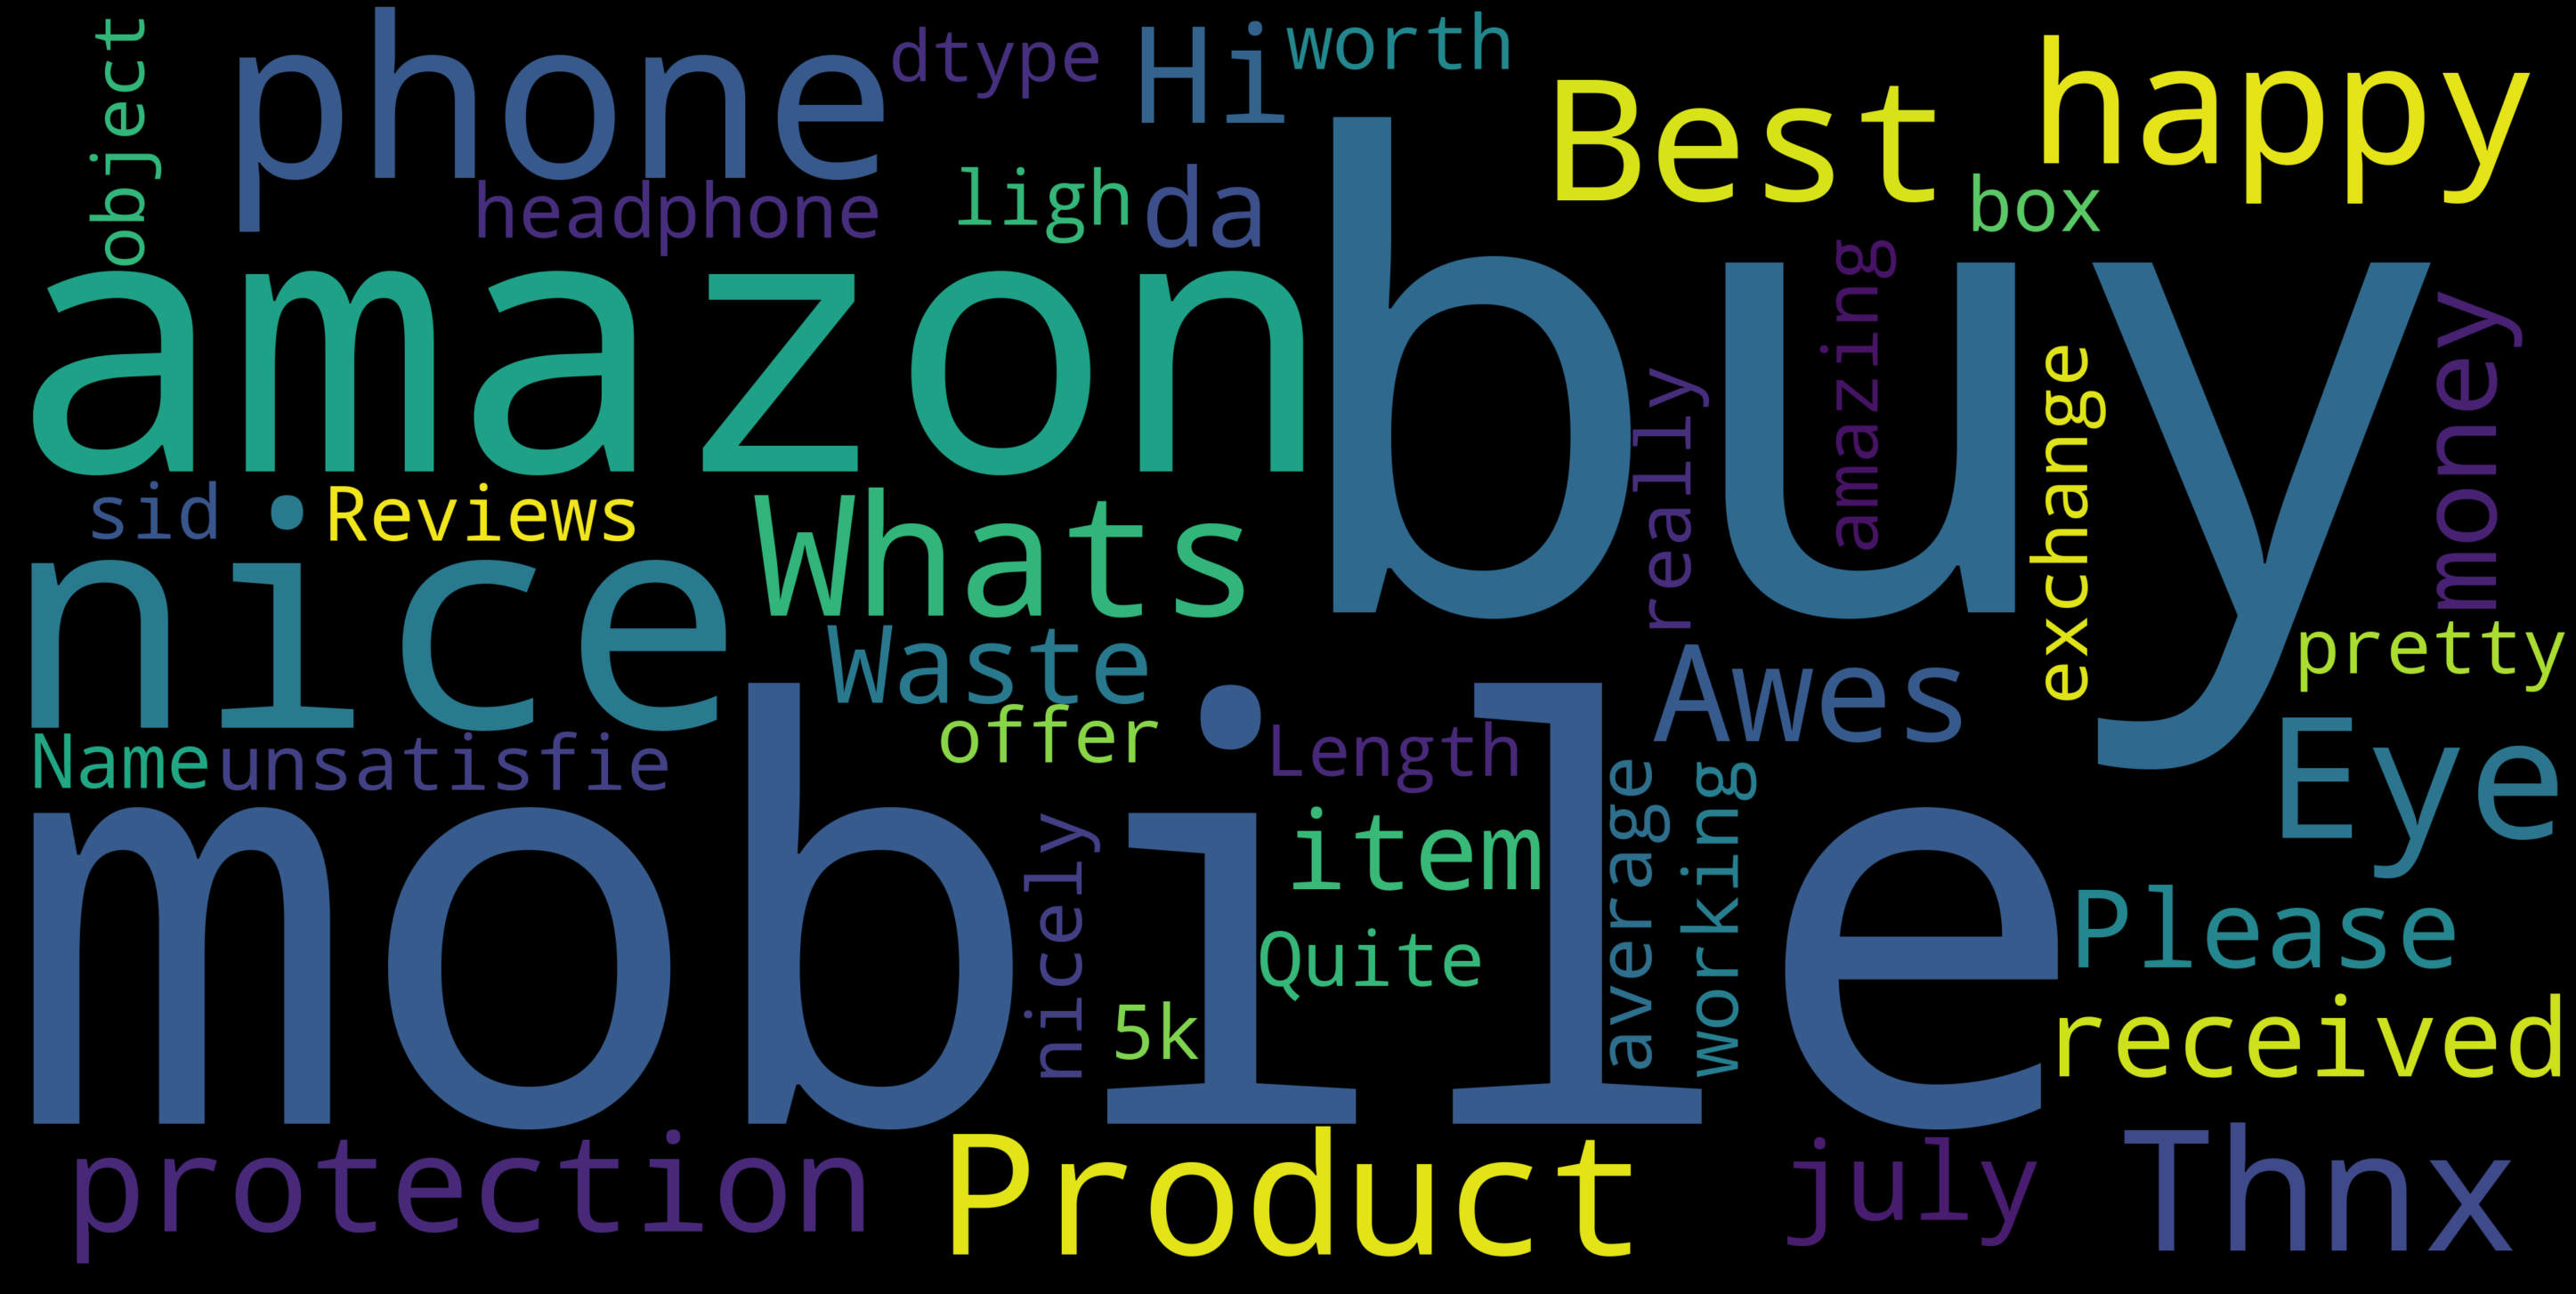

In [ ]:
#plotting wordcloud for the fourth device's review 
reviews4=df4['Reviews']

wordcloud = WordCloud(
    width = 4000,
    height = 2000,
    background_color = 'black',
    stopwords = STOPWORDS).generate(str(reviews4))
fig = plt.figure(
    figsize = (40, 30),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

**Sentiment Analysis**

In [ ]:
#for calculating polarity for any word or sentence, used TextBlob library
from textblob import TextBlob

#function which returns polarity calculated using textblob
def getPolarity(review):
  return TextBlob(review).sentiment.polarity

In [ ]:
#import necessary libraries used in the preprocessing
import os
import pydrive
import re
from nltk.corpus import stopwords
from gensim.parsing.preprocessing import remove_stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
ps = PorterStemmer()
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
import nltk
#nltk library for preprocessing
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np

#fucntion used for trainig of reviews on a sample of reviews and then prediciting sentiment for other basis on the trained model
def applying_naive_bayes_for_different_phones(df_fun):

  #caluclating polarity for each of the review while iterating over each of review
  polarity_scores_for_df=[]
  for i in range(len(df_fun)):
    temp_polarity=float(getPolarity(df_fun['Reviews'][i]))
    polarity_scores_for_df.append(temp_polarity)

  #storing polarity score for the review in the dataframe 
  df_fun['Polarity Score']=polarity_scores_for_df

  #pre-processed eahc of review for creating feature matrix
  preprocessed_query_list=[]
  for i in range(len(df_fun)):
    temp_review=df_fun['Reviews'][i]
    #coverting review to lowercase
    temp_review = temp_review.lower()
    #remving any digit present in the review
    temp_review = re.sub(r'\d+','',temp_review)
    #remove extra whitespaces present 
    temp_review = re.sub(r'[^\w\s]','', temp_review)
    #removing speacial characters
    temp_review= re.sub('[@_!#$%^&*()<>?/\|}{~:]','',temp_review)
    #stripping extra spaces on left and right
    temp_review = temp_review.strip()
    #removing all the stopwords present in the review
    temp_review = remove_stopwords(temp_review)
    words = word_tokenize(temp_review)
    #storing the stemmed words finally in the string 
    temp_string=""
    for word in words:
      temp_string=temp_string+" "+ps.stem(word)

    #storing all the string in a list
    preprocessed_query_list.append(temp_string)
  #appending each of the string in the dataframe with their respective entry
  df_fun['Preprocessed Query']=preprocessed_query_list

  #estimating whether review is positive, negative or neutral basis on the polarity score
  #if greater than zero, then 1(positive review)
  #if less than zero, then -1(negative reivew)
  #if zero, then 0(neutral review)
  polarity_score_training=[]
  for i in range(len(df_fun)):
    if df_fun['Polarity Score'][i]>0:
      polarity_score_training.append(1)
    elif df_fun['Polarity Score'][i]==0:
      polarity_score_training.append(0)
    else:
      polarity_score_training.append(-1)

  df_fun['polarity score training']=polarity_score_training

  #splitting dataset for training of model and then, predicition of sentiment 
  df_train=df_fun.iloc[:10, :]
  df_test=df_fun.iloc[10:,:]


  #Split into training and testing data
  x = df_train['Preprocessed Query']
  y = df_train['polarity score training']

  x, x_test, y, y_test = train_test_split(x,y, test_size=0.25, random_state=42)

  #vectoriziing the input 
  vec = CountVectorizer(stop_words='english')
  x = vec.fit_transform(x).toarray()
  x_test = vec.transform(x_test).toarray()

  #applying multinomial Naive Bayes from sklearn kit
  from sklearn.naive_bayes import MultinomialNB

  model = MultinomialNB()
  #fitting the model to earlier splitted training data
  model.fit(x, y)

  x_testing = df_test['Preprocessed Query']
  y_testing = df_test['polarity score training']
  x_testing = vec.transform(x_testing).toarray()
  # print("score for the model on validation data is :: ",model.score(x_test, y_test))
  
  print("score for the model on testing data is :: ",model.score(x_testing, y_testing))

  #predciting sentiment for the rest data using the trained model 
  y_predicted=model.predict(x_testing)
  y=np.array(y)
  y_return = np.concatenate((y, y_predicted))
  


  return y_return,model


In [ ]:
import pickle
#applying model for the first selected device
y_return_1,model1=applying_naive_bayes_for_different_phones(df1)


score for the model on testing data is ::  0.8


In [ ]:
with open('firstbaseline_model1', 'wb') as files:
    pickle.dump(model1, files)

In [ ]:
#initializing empty list for storing polarity for the predicted sentiments 
sentiment_scores=[]
sentiment_polarity=[]

In [ ]:
#iterated over each of the predicted sentiment value 
#counted positive and negative review counts
#basis on the weight, predicted whether whole review must be postivr or negative
#calculated score for the respective
#if positive - total_postive_review_count/total_number_of_reviews
#if negative - total_negative_review_count/total_number_of_reviews
total_count=0.0
count_postive=0.0
count_negative=0.0
for i in range(len(y_return_1)):
  if y_return_1[i]==1:
    count_postive=count_postive+1
  
  elif y_return_1[i]==-1:
    count_negative=count_negative+1

  total_count=total_count+1

if(count_postive>count_negative):
  temp=float(float(count_postive)/float(total_count))
  score=1
else:
  temp=float(float(count_negative)/float(total_count))
  score=-1

sentiment_scores.append(score)
sentiment_polarity.append(temp)

In [ ]:
#getting only top 4 ranked devies from the previously ranked devices
df_top_phones=df_sorted_score[:4]

In [ ]:
#applying model for the second selected device
y_return_2,model2=applying_naive_bayes_for_different_phones(df2)

score for the model on testing data is ::  0.9


In [ ]:
with open('firstbaseline_model2', 'wb') as files:
    pickle.dump(model2, files)

In [ ]:
#iterated over each of the predicted sentiment value 
#counted positive and negative review counts
#basis on the weight, predicted whether whole review must be postivr or negative
#calculated score for the respective
#if positive - total_postive_review_count/total_number_of_reviews
#if negative - total_negative_review_count/total_number_of_reviews
total_count=0.0
count_postive=0.0
count_negative=0.0
for i in range(len(y_return_2)):
  if y_return_2[i]==1:
    count_postive=count_postive+1
  
  elif y_return_2[i]==-1:
    count_negative=count_negative+1

  total_count=total_count+1

if(count_postive>count_negative):
  temp=float(float(count_postive)/float(total_count))
  score=1
else:
  temp=float(float(count_negative)/float(total_count))
  score=-1

sentiment_scores.append(score)
sentiment_polarity.append(temp)

In [ ]:
#applying model for the third selected device
y_return_3,model3=applying_naive_bayes_for_different_phones(df3)

score for the model on testing data is ::  0.9


In [ ]:
with open('firstbaseline_model3', 'wb') as files:
    pickle.dump(model3, files)

In [ ]:
#iterated over each of the predicted sentiment value 
#counted positive and negative review counts
#basis on the weight, predicted whether whole review must be postivr or negative
#calculated score for the respective
#if positive - total_postive_review_count/total_number_of_reviews
#if negative - total_negative_review_count/total_number_of_reviews
total_count=0.0
count_postive=0.0
count_negative=0.0
for i in range(len(y_return_3)):
  if y_return_3[i]==1:
    count_postive=count_postive+1
  
  elif y_return_3[i]==-1:
    count_negative=count_negative+1

  total_count=total_count+1

if(count_postive>count_negative):
  temp=float(float(count_postive)/float(total_count))
  score=1
else:
  temp=float(float(count_negative)/float(total_count))
  score=-1

sentiment_scores.append(score)
sentiment_polarity.append(temp)

In [ ]:
#applying model for the fourth selected device
y_return_4,model4=applying_naive_bayes_for_different_phones(df4)

score for the model on testing data is ::  1.0


In [ ]:
with open('firstbaseline_model4', 'wb') as files:
    pickle.dump(model4, files)

In [ ]:
#iterated over each of the predicted sentiment value 
#counted positive and negative review counts
#basis on the weight, predicted whether whole review must be postivr or negative
#calculated score for the respective
#if positive - total_postive_review_count/total_number_of_reviews
#if negative - total_negative_review_count/total_number_of_reviews
total_count=0.0
count_postive=0.0
count_negative=0.0
for i in range(len(y_return_4)):
  if y_return_4[i]==1:
    count_postive=count_postive+1
  
  elif y_return_4[i]==-1:
    count_negative=count_negative+1

  total_count=total_count+1

if(count_postive>count_negative):
  temp=float(float(count_postive)/float(total_count))
  score=1
else:
  temp=float(float(count_negative)/float(total_count))
  score=-1

sentiment_scores.append(score)
sentiment_polarity.append(temp)

In [ ]:
#appeding all four devices polarity to the dataframe
df_top_phones['sentiment_scores']=sentiment_scores
df_top_phones['sentiment_polarity']=sentiment_polarity

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
df_top_phones

,product title,product price,overall rating,total reviews,Availability,URL,popularity score,extracted ratings,extracted reviews,probab score,sentiment_scores,sentiment_polarity
0,Samsung Galaxy M21 2021 Edition (Arctic Blue 4...,0.166667,4.2 out of 5 stars,213849 ratings,In stock.,https://www.amazon.in/Samsung-Storage-sAMOLED-...,1.0,0.4,1.000000,0.558333,1,0.700050
1,Redmi 9A Sport (Metallic Blue 2GB RAM 32GB Sto...,0.000000,4.2 out of 5 stars,155696 ratings,,https://www.amazon.in/Redmi-9A-Sport-Octa-core...,1.0,0.4,0.719107,0.529777,1,0.899850
2,Redmi 9 Activ (Coral Green 4GB RAM 64GB Storage),0.069444,4.2 out of 5 stars,152189 ratings,,https://www.amazon.in/Redmi-Activ-Coral-Green-...,1.0,0.4,0.702167,0.508181,1,0.624922
3,Samsung Galaxy M12 (Blue6GB RAM 128GB Storage)...,0.125000,4.1 out of 5 stars,132840 ratings,In stock.,https://www.amazon.in/Samsung-Galaxy-M12-Stora...,1.0,0.2,0.608707,0.420927,-1,0.699549


In [ ]:
#calulating final score by giving equal weigtage to previously buying proability and sentiment analysis score 
final_score=[]
for i in range(len(df_top_phones)):
  if df_top_phones['sentiment_scores'][i]==1:
    temp=float(float(df_top_phones['probab score'][i])+float(df_top_phones['sentiment_polarity'][i]))
    final_score.append(temp)

  elif df_top_phones['sentiment_scores'][i]==-1:
    temp=float(float(df_top_phones['probab score'][i])-float(df_top_phones['sentiment_polarity'][i]))
    final_score.append(temp)


In [ ]:
#storing combined score as well to the dataframe
df_top_phones['final_score']=final_score

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
#sorting based on the final score
final_ranking=df_top_phones.sort_values('final_score',ascending=True)

In [ ]:
#resetting the index
final_ranking.reset_index(drop=True, inplace=True)

In [ ]:
#visualizing final raking for the top 4 producted based on price, total reviews, reviews, popularity and ratings
final_ranking

,product title,product price,overall rating,total reviews,Availability,URL,popularity score,extracted ratings,extracted reviews,probab score,sentiment_scores,sentiment_polarity,final_score
0,Samsung Galaxy M12 (Blue6GB RAM 128GB Storage)...,0.125000,4.1 out of 5 stars,132840 ratings,In stock.,https://www.amazon.in/Samsung-Galaxy-M12-Stora...,1.0,0.2,0.608707,0.420927,-1,0.699549,-0.278623
1,Redmi 9 Activ (Coral Green 4GB RAM 64GB Storage),0.069444,4.2 out of 5 stars,152189 ratings,,https://www.amazon.in/Redmi-Activ-Coral-Green-...,1.0,0.4,0.702167,0.508181,1,0.624922,1.133102
2,Samsung Galaxy M21 2021 Edition (Arctic Blue 4...,0.166667,4.2 out of 5 stars,213849 ratings,In stock.,https://www.amazon.in/Samsung-Storage-sAMOLED-...,1.0,0.4,1.000000,0.558333,1,0.700050,1.258383
3,Redmi 9A Sport (Metallic Blue 2GB RAM 32GB Sto...,0.000000,4.2 out of 5 stars,155696 ratings,,https://www.amazon.in/Redmi-9A-Sport-Octa-core...,1.0,0.4,0.719107,0.529777,1,0.899850,1.429627


In [ ]:
for i in range(len(final_ranking)):
  print("Ranked ",final_ranking['product title'][i]," on position : ",(i+1))
  print("---------")
  print()
  print()


Ranked  Samsung Galaxy M12 (Blue6GB RAM 128GB Storage) 6 Months Free Screen Replacement for Prime  on position :  1
---------


Ranked  Redmi 9 Activ (Coral Green 4GB RAM 64GB Storage)  on position :  2
---------


Ranked  Samsung Galaxy M21 2021 Edition (Arctic Blue 4GB RAM 64GB Storage) | FHD+ sAMOLED | 6 Months Free Screen Replacement for Prime (SM-M215GLBDINS)  on position :  3
---------


Ranked  Redmi 9A Sport (Metallic Blue 2GB RAM 32GB Storage) | 2GHz Octa-core Helio G25 Processor | 5000 mAh Battery  on position :  4
---------


